In [1]:
# import libraries 
import math 
import pandas_datareader as web 
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense ,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2024-03-16 21:33:00.119071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 21:33:00.119202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 21:33:00.277981: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Get Sp 500 Data 

In [2]:
# get the stock quote
!pip install yfinance
import yfinance as yf
# Fetch S&P 500 data
df = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')

# Display the first few rows of the DataFrame
df.head()

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=52661da7d84cec8832055e231351eff1a407f98b59d788b79dc57be221295c41
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000


In [3]:
# get the number of rows and columns in the data set 
df.shape

(2516, 6)

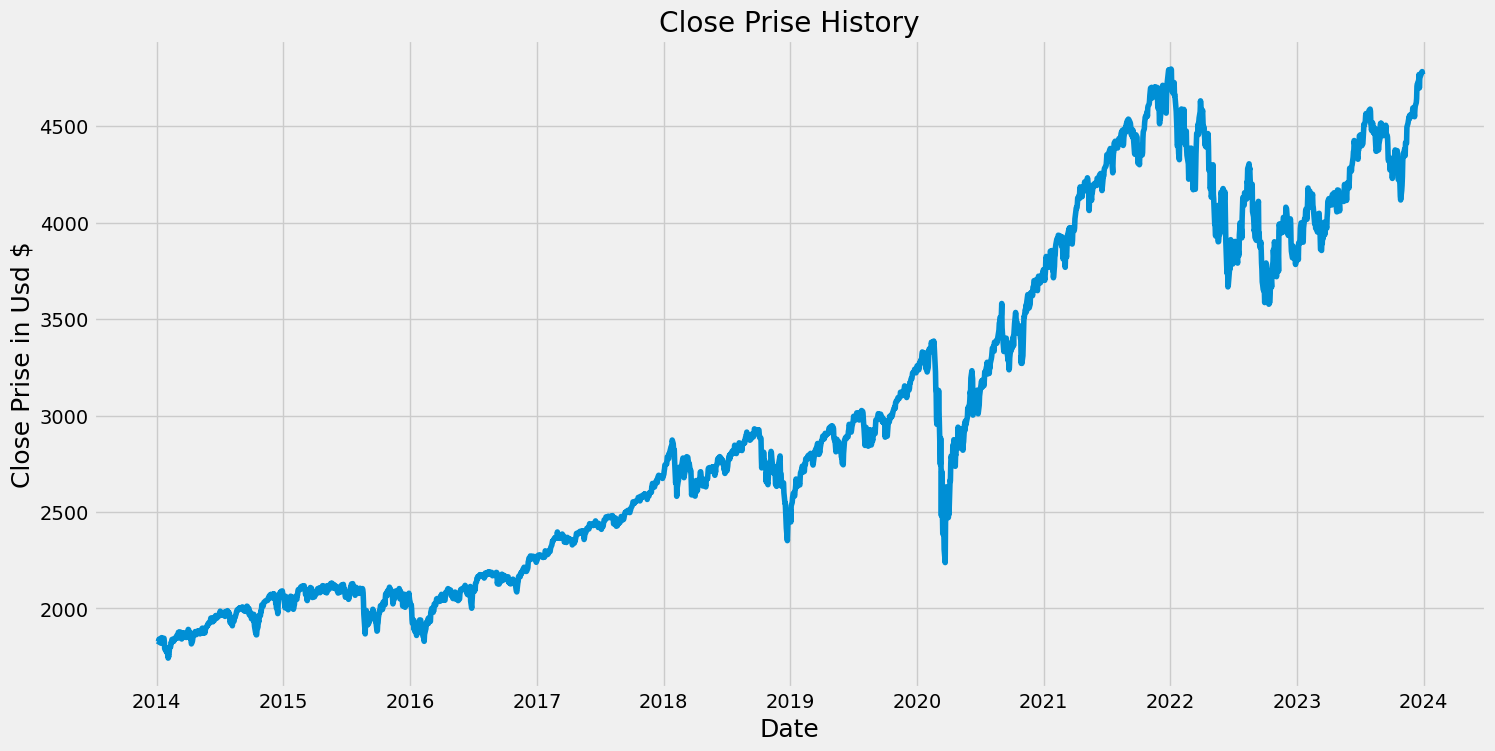

In [4]:
# visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Prise History')
plt.plot(df['Close'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Prise in Usd $", fontsize = 18)
plt.show()



# Scale the Data 


In [5]:
# Create a new data frame with only Close columns 
data = df.filter(['Close'])
# convert the data frame to numpy arrays
dataset = data.values
# get the number of rows to train the model on
training_data_len  = math.ceil(len(dataset) * .8)
training_data_len 

2013

In [6]:
# scale the data 
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02949254],
       [0.02929285],
       [0.02778696],
       ...,
       [0.99509604],
       [0.99567549],
       [0.99124947]])

In [7]:
# create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61 :
        print(x_train)
        print(y_train)
        print()


[array([0.02949254, 0.02929285, 0.02778696, 0.03142401, 0.03129633,
       0.03150585, 0.03289389, 0.02530877, 0.03175138, 0.03486137,
       0.03404623, 0.03169244, 0.03336204, 0.03370903, 0.0283402 ,
       0.0158446 , 0.01298669, 0.01656807, 0.01057723, 0.0171213 ,
       0.01332385, 0.        , 0.00435724, 0.00319183, 0.01032519,
       0.01804778, 0.01897094, 0.02548884, 0.02532843, 0.02878869,
       0.03166954, 0.03236683, 0.02843514, 0.03204602, 0.0308904 ,
       0.03460929, 0.03379415, 0.03380726, 0.03679613, 0.03848531,
       0.03399384, 0.04321908, 0.04318635, 0.04424046, 0.04457111,
       0.0442863 , 0.0411632 , 0.04134978, 0.03419353, 0.03248796,
       0.03828235, 0.04267564, 0.03891746, 0.04259707, 0.04079983,
       0.0378273 , 0.04050519, 0.03622979, 0.03507745, 0.03788625])]
[0.04270508738920631]

[array([0.02949254, 0.02929285, 0.02778696, 0.03142401, 0.03129633,
       0.03150585, 0.03289389, 0.02530877, 0.03175138, 0.03486137,
       0.03404623, 0.03169244, 0.03

In [8]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reschape the data 
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1953, 60, 1)

# # Build the LSTM Model


In [10]:
#build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#Compile the Model 
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

# # Train the Model


In [12]:
#Train the Model
model.fit(x_train,y_train, batch_size = 1 , epochs = 1)

1953/1953 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - loss: 0.0020


In [13]:
#create the testing data set 
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_train and y_train:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
#convert the data set to a numpy array
x_test = np.array(x_test)

In [15]:
# Reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [17]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

277.4436603038022

# # Ploting the data

/tmp/ipykernel_18/3915310968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


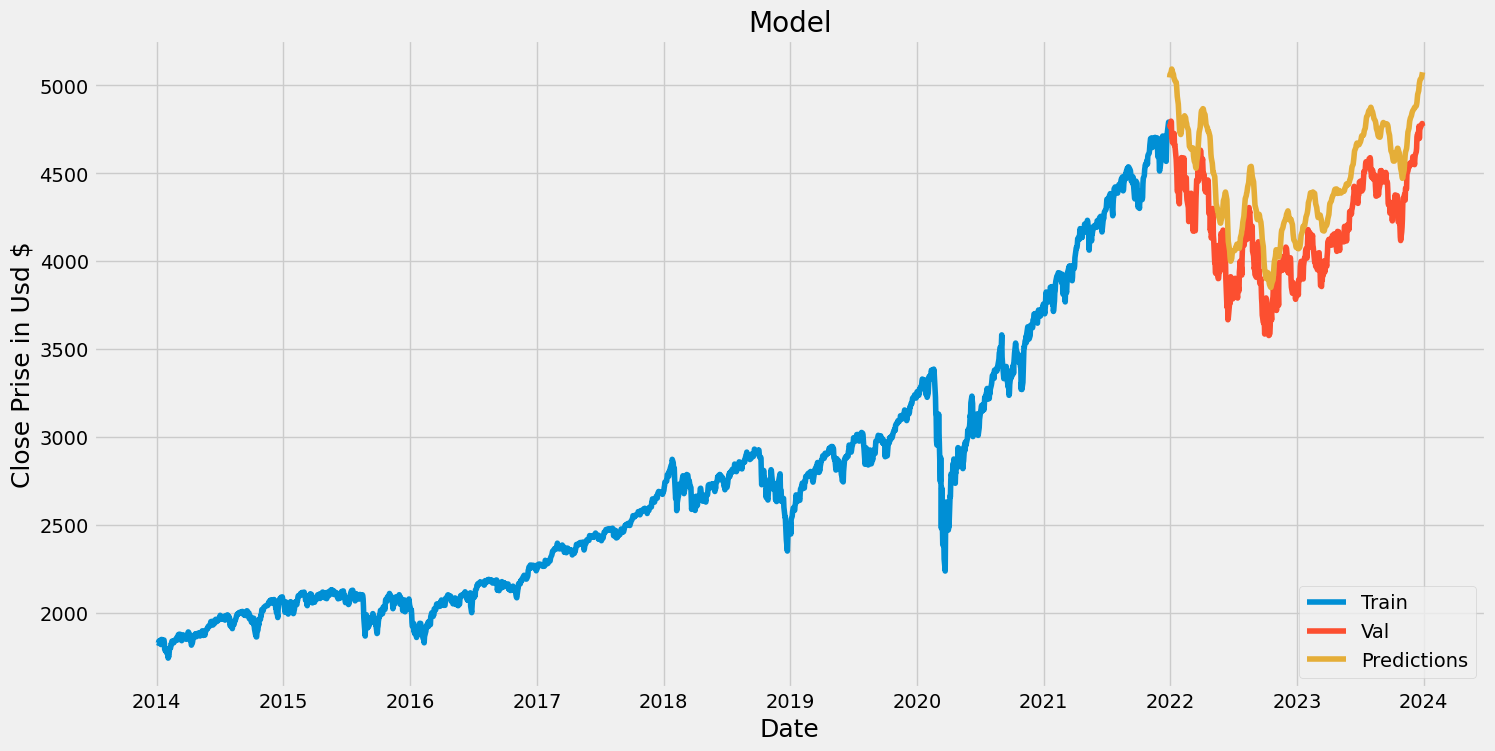

In [18]:
# plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data 
plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Prise in Usd $",fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = "lower right")
plt.show()




In [19]:
# Show the Valid and predicted prices
valid

,Close,Predictions
Date,,
2021-12-30,4778.729980,5045.033203
2021-12-31,4766.180176,5061.983887
2022-01-03,4796.560059,5073.086426
2022-01-04,4793.540039,5084.210449
2022-01-05,4700.580078,5093.200195
...,...,...
2023-12-22,4754.629883,5033.078613
2023-12-26,4774.750000,5043.010742
2023-12-27,4781.580078,5054.065918


In [20]:
# get the quote
sp_quote = yf.download('^GSPC', start='2014-01-01', end='2024-03-11')
sp_quote
#create a new data frame 
new_df = sp_quote.filter(['Close'])
#get the last 60 day closing price values and conver to numpy array
last_60_days = new_df[-60:].values
#scale the data to values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)
#crate an empty list 
X_test = []
# append the past 60 days 
X_test.append(last_60_days_scaled)
#convert to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[5442.3867]]


In [21]:
# the valid price for 2024-03-12
sp_quote2 = yf.download('^GSPC', start='2024-03-12', end='2024-03-13')
print(sp_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-03-12    5175.27002
Name: Close, dtype: float64


# 